# De-noising.....

In [1]:
from keras.models import load_model
import cv2
import numpy as np

Using TensorFlow backend.


In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# load images..........
from PIL import Image
import glob
images = []

for filename in glob.glob('chest_xray//validation//NORMAL//*.jpeg'): 
    #im=Image.open(filename)
    im = cv2.imread(filename)
    im = cv2.resize(im, (28,28))
    print(im)
    images.append(im)

for filename in glob.glob('chest_xray//validation//PNEUMONIA//*.jpeg'):
    #im=Image.open(filename)
    im = cv2.imread(filename)
    im = cv2.resize(im, (28,28))
    print(im)
    images.append(im)

[[[32 32 32]
  [27 27 27]
  [28 28 28]
  ...
  [28 28 28]
  [30 30 30]
  [33 33 33]]

 [[30 30 30]
  [26 26 26]
  [23 23 23]
  ...
  [26 26 26]
  [28 28 28]
  [32 32 32]]

 [[29 29 29]
  [24 24 24]
  [18 18 18]
  ...
  [17 17 17]
  [20 20 20]
  [27 27 27]]

 ...

 [[29 29 29]
  [28 28 28]
  [23 23 23]
  ...
  [21 21 21]
  [28 28 28]
  [31 31 31]]

 [[29 29 29]
  [28 28 28]
  [24 24 24]
  ...
  [22 22 22]
  [32 32 32]
  [35 35 35]]

 [[30 30 30]
  [27 27 27]
  [26 26 26]
  ...
  [22 22 22]
  [32 32 32]
  [34 34 34]]]
[[[ 29  29  29]
  [125 125 125]
  [153 153 153]
  ...
  [165 165 165]
  [153 153 153]
  [120 120 120]]

 [[ 30  30  30]
  [109 109 109]
  [156 156 156]
  ...
  [175 175 175]
  [151 151 151]
  [122 122 122]]

 [[ 33  33  33]
  [ 93  93  93]
  [149 149 149]
  ...
  [171 171 171]
  [143 143 143]
  [100 100 100]]

 ...

 [[ 39  39  39]
  [ 41  41  41]
  [ 32  32  32]
  ...
  [ 25  25  25]
  [ 33  33  33]
  [ 35  35  35]]

 [[ 43  43  43]
  [ 41  41  41]
  [ 32  32  32]
  ...
  

[[[ 11  11  11]
  [ 11  11  11]
  [ 10  10  10]
  ...
  [ 11  11  11]
  [ 13  13  13]
  [ 13  13  13]]

 [[ 11  11  11]
  [ 11  11  11]
  [ 10  10  10]
  ...
  [  4   4   4]
  [  7   7   7]
  [ 13  13  13]]

 [[ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]
  ...
  [ 46  46  46]
  [ 51  51  51]
  [ 62  62  62]]

 ...

 [[  9   9   9]
  [  1   1   1]
  [ 92  92  92]
  ...
  [127 127 127]
  [ 62  62  62]
  [ 19  19  19]]

 [[ 10  10  10]
  [  5   5   5]
  [ 75  75  75]
  ...
  [120 120 120]
  [ 43  43  43]
  [ 21  21  21]]

 [[ 10  10  10]
  [  6   6   6]
  [ 70  70  70]
  ...
  [121 121 121]
  [  2   2   2]
  [ 19  19  19]]]
[[[ 3  3  3]
  [ 5  5  5]
  [ 8  8  8]
  ...
  [ 8  8  8]
  [ 7  7  7]
  [ 7  7  7]]

 [[ 4  4  4]
  [ 5  5  5]
  [ 5  5  5]
  ...
  [ 6  6  6]
  [ 7  7  7]
  [ 9  9  9]]

 [[ 5  5  5]
  [ 3  3  3]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 5  5  5]
  [11 11 11]]

 ...

 [[ 2  2  2]
  [ 4  4  4]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 7  7  7]
  [ 5  5  5]]

 [[ 2  2  2]
  [ 4  

[[[  0   0   0]
  [ 28  28  28]
  [ 27  27  27]
  ...
  [ 29  29  29]
  [ 29  29  29]
  [  0   0   0]]

 [[  0   0   0]
  [ 26  26  26]
  [ 25  25  25]
  ...
  [ 19  19  19]
  [ 22  22  22]
  [  0   0   0]]

 [[  0   0   0]
  [ 21  21  21]
  [ 47  47  47]
  ...
  [107 107 107]
  [ 91  91  91]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [ 24  24  24]
  [ 22  22  22]
  ...
  [ 35  35  35]
  [ 25  25  25]
  [  0   0   0]]

 [[  0   0   0]
  [ 24  24  24]
  [ 23  23  23]
  ...
  [ 15  15  15]
  [ 25  25  25]
  [  0   0   0]]

 [[  0   0   0]
  [ 24  24  24]
  [ 24  24  24]
  ...
  [ 19  19  19]
  [ 25  25  25]
  [  0   0   0]]]
[[[  0   0   0]
  [ 78  78  78]
  [ 58  58  58]
  ...
  [ 42  42  42]
  [ 25  25  25]
  [  0   0   0]]

 [[  0   0   0]
  [ 80  80  80]
  [ 62  62  62]
  ...
  [ 37  37  37]
  [ 12  12  12]
  [  0   0   0]]

 [[  0   0   0]
  [ 82  82  82]
  [ 59  59  59]
  ...
  [ 27  27  27]
  [ 10  10  10]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [143 143 143]
  [ 99  99  99]
  ..

[[[  0   0   0]
  [ 59  59  59]
  [ 66  66  66]
  ...
  [103 103 103]
  [ 70  70  70]
  [  0   0   0]]

 [[  0   0   0]
  [ 52  52  52]
  [ 64  64  64]
  ...
  [117 117 117]
  [ 75  75  75]
  [  0   0   0]]

 [[  0   0   0]
  [ 47  47  47]
  [ 69  69  69]
  ...
  [ 74  74  74]
  [ 71  71  71]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [ 31  31  31]
  [ 17  17  17]
  ...
  [ 26  26  26]
  [ 18  18  18]
  [  0   0   0]]

 [[  0   0   0]
  [ 30  30  30]
  [ 17  17  17]
  ...
  [ 18  18  18]
  [ 18  18  18]
  [  0   0   0]]

 [[  0   0   0]
  [ 31  31  31]
  [ 16  16  16]
  ...
  [ 18  18  18]
  [ 18  18  18]
  [  0   0   0]]]
[[[ 0  0  0]
  [14 14 14]
  [15 15 15]
  ...
  [18 18 18]
  [18 18 18]
  [ 0  0  0]]

 [[ 0  0  0]
  [48 48 48]
  [43 43 43]
  ...
  [16 16 16]
  [17 17 17]
  [ 0  0  0]]

 [[ 0  0  0]
  [96 96 96]
  [96 96 96]
  ...
  [28 28 28]
  [15 15 15]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [11 11 11]
  [93 93 93]
  ...
  [12 12 12]
  [17 17 17]
  [ 0  0  0]]

 [[ 0  0  0]
  [11 1

  [  0   0   0]]]
[[[ 86  86  86]
  [141 141 141]
  [139 139 139]
  ...
  [ 72  72  72]
  [  3   3   3]
  [ 16  16  16]]

 [[ 93  93  93]
  [150 150 150]
  [150 150 150]
  ...
  [ 61  61  61]
  [  7   7   7]
  [ 18  18  18]]

 [[ 90  90  90]
  [140 140 140]
  [134 134 134]
  ...
  [ 54  54  54]
  [  9   9   9]
  [ 17  17  17]]

 ...

 [[ 21  21  21]
  [ 17  17  17]
  [ 26  26  26]
  ...
  [ 12  12  12]
  [ 21  21  21]
  [ 23  23  23]]

 [[ 20  20  20]
  [ 17  17  17]
  [  0   0   0]
  ...
  [ 12  12  12]
  [ 21  21  21]
  [ 24  24  24]]

 [[ 20  20  20]
  [ 17  17  17]
  [  1   1   1]
  ...
  [ 11  11  11]
  [ 21  21  21]
  [ 25  25  25]]]
[[[ 37  37  37]
  [ 61  61  61]
  [ 63  63  63]
  ...
  [ 58  58  58]
  [ 54  54  54]
  [ 17  17  17]]

 [[ 36  36  36]
  [ 61  61  61]
  [ 64  64  64]
  ...
  [ 57  57  57]
  [ 53  53  53]
  [ 18  18  18]]

 [[ 29  29  29]
  [ 55  55  55]
  [ 67  67  67]
  ...
  [ 53  53  53]
  [ 51  51  51]
  [ 19  19  19]]

 ...

 [[ 41  41  41]
  [120 120 120]
  

[[[  9   9   9]
  [ 79  79  79]
  [125 125 125]
  ...
  [128 128 128]
  [105 105 105]
  [ 49  49  49]]

 [[ 13  13  13]
  [ 75  75  75]
  [127 127 127]
  ...
  [130 130 130]
  [106 106 106]
  [ 41  41  41]]

 [[ 14  14  14]
  [ 69  69  69]
  [120 120 120]
  ...
  [126 126 126]
  [ 98  98  98]
  [ 39  39  39]]

 ...

 [[ 24  24  24]
  [ 11  11  11]
  [195 195 195]
  ...
  [ 57  57  57]
  [ 22  22  22]
  [ 25  25  25]]

 [[ 23  23  23]
  [  3   3   3]
  [193 193 193]
  ...
  [ 59  59  59]
  [ 21  21  21]
  [ 24  24  24]]

 [[ 22  22  22]
  [ 25  25  25]
  [180 180 180]
  ...
  [ 64  64  64]
  [ 20  20  20]
  [ 24  24  24]]]
[[[ 45  45  45]
  [ 60  60  60]
  [112 112 112]
  ...
  [ 79  79  79]
  [ 74  74  74]
  [ 43  43  43]]

 [[ 44  44  44]
  [ 62  62  62]
  [108 108 108]
  ...
  [ 76  76  76]
  [ 63  63  63]
  [ 38  38  38]]

 [[ 44  44  44]
  [ 68  68  68]
  [ 78  78  78]
  ...
  [ 73  73  73]
  [ 62  62  62]
  [ 34  34  34]]

 ...

 [[ 12  12  12]
  [ 61  61  61]
  [142 142 142]
  ..

[[[ 60  60  60]
  [ 91  91  91]
  [127 127 127]
  ...
  [135 135 135]
  [ 92  92  92]
  [ 58  58  58]]

 [[ 62  62  62]
  [ 94  94  94]
  [127 127 127]
  ...
  [148 148 148]
  [101 101 101]
  [ 52  52  52]]

 [[ 57  57  57]
  [ 93  93  93]
  [137 137 137]
  ...
  [131 131 131]
  [100 100 100]
  [ 51  51  51]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [ 57  57  57]
  ...
  [158 158 158]
  [ 16  16  16]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 56  56  56]
  ...
  [147 147 147]
  [ 14  14  14]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 56  56  56]
  ...
  [160 160 160]
  [ 15  15  15]
  [  0   0   0]]]
[[[ 42  42  42]
  [ 30  30  30]
  [ 15  15  15]
  ...
  [165 165 165]
  [156 156 156]
  [131 131 131]]

 [[ 69  69  69]
  [ 70  70  70]
  [ 74  74  74]
  ...
  [177 177 177]
  [164 164 164]
  [145 145 145]]

 [[ 94  94  94]
  [103 103 103]
  [ 98  98  98]
  ...
  [170 170 170]
  [158 158 158]
  [103 103 103]]

 ...

 [[  0   0   0]
  [ 69  69  69]
  [116 116 116]
  ..

[[[ 61  61  61]
  [ 74  74  74]
  [ 71  71  71]
  ...
  [ 75  75  75]
  [ 56  56  56]
  [ 44  44  44]]

 [[ 94  94  94]
  [ 97  97  97]
  [ 79  79  79]
  ...
  [ 69  69  69]
  [ 49  49  49]
  [ 29  29  29]]

 [[ 96  96  96]
  [119 119 119]
  [ 82  82  82]
  ...
  [ 65  65  65]
  [ 46  46  46]
  [ 10  10  10]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [138 138 138]
  [ 22  22  22]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  1   1   1]
  ...
  [165 165 165]
  [ 29  29  29]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [123 123 123]
  [ 48  48  48]
  [  0   0   0]]]
[[[  0   0   0]
  [ 42  42  42]
  [114 114 114]
  ...
  [108 108 108]
  [ 50  50  50]
  [  0   0   0]]

 [[  0   0   0]
  [ 26  26  26]
  [110 110 110]
  ...
  [110 110 110]
  [ 33  33  33]
  [  0   0   0]]

 [[  0   0   0]
  [ 16  16  16]
  [102 102 102]
  ...
  [ 99  99  99]
  [ 16  16  16]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..

[[[ 53  53  53]
  [ 79  79  79]
  [ 85  85  85]
  ...
  [ 72  72  72]
  [ 36  36  36]
  [ 59  59  59]]

 [[ 37  37  37]
  [ 82  82  82]
  [ 87  87  87]
  ...
  [ 65  65  65]
  [ 28  28  28]
  [ 42  42  42]]

 [[ 35  35  35]
  [ 73  73  73]
  [ 84  84  84]
  ...
  [ 57  57  57]
  [ 19  19  19]
  [ 43  43  43]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [ 63  63  63]
  ...
  [136 136 136]
  [ 31  31  31]
  [  1   1   1]]

 [[  0   0   0]
  [  1   1   1]
  [ 65  65  65]
  ...
  [136 136 136]
  [ 30  30  30]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 65  65  65]
  ...
  [112 112 112]
  [ 25  25  25]
  [  1   1   1]]]
[[[ 28  28  28]
  [ 68  68  68]
  [ 75  75  75]
  ...
  [ 86  86  86]
  [ 66  66  66]
  [ 29  29  29]]

 [[ 19  19  19]
  [ 72  72  72]
  [ 87  87  87]
  ...
  [ 90  90  90]
  [ 70  70  70]
  [ 16  16  16]]

 [[  9   9   9]
  [ 76  76  76]
  [ 88  88  88]
  ...
  [ 94  94  94]
  [ 68  68  68]
  [  9   9   9]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [ 52  52  52]
  ..

[[[ 57  57  57]
  [121 121 121]
  [112 112 112]
  ...
  [134 134 134]
  [ 77  77  77]
  [ 55  55  55]]

 [[ 55  55  55]
  [ 69  69  69]
  [123 123 123]
  ...
  [129 129 129]
  [ 84  84  84]
  [ 55  55  55]]

 [[ 67  67  67]
  [ 65  65  65]
  [130 130 130]
  ...
  [105 105 105]
  [ 87  87  87]
  [ 40  40  40]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [145 145 145]
  [  4   4   4]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [127 127 127]
  [ 12  12  12]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [138 138 138]
  [ 15  15  15]
  [  0   0   0]]]
[[[ 89  89  89]
  [ 72  72  72]
  [157 157 157]
  ...
  [162 162 162]
  [123 123 123]
  [107 107 107]]

 [[ 78  78  78]
  [ 87  87  87]
  [157 157 157]
  ...
  [142 142 142]
  [136 136 136]
  [ 72  72  72]]

 [[ 75  75  75]
  [ 84  84  84]
  [104 104 104]
  ...
  [124 124 124]
  [103 103 103]
  [ 88  88  88]]

 ...

 [[  0   0   0]
  [ 60  60  60]
  [140 140 140]
  ..

  [  0   0   0]]]
[[[ 0  0  0]
  [36 36 36]
  [90 90 90]
  ...
  [59 59 59]
  [25 25 25]
  [ 0  0  0]]

 [[ 0  0  0]
  [20 20 20]
  [83 83 83]
  ...
  [42 42 42]
  [ 2  2  2]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 5  5  5]
  [56 56 56]
  ...
  [28 28 28]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [52 52 52]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [54 54 54]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [48 48 48]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
[[[ 44  44  44]
  [ 84  84  84]
  [ 89  89  89]
  ...
  [116 116 116]
  [ 98  98  98]
  [106 106 106]]

 [[ 41  41  41]
  [ 42  42  42]
  [ 51  51  51]
  ...
  [125 125 125]
  [105 105 105]
  [ 46  46  46]]

 [[ 39  39  39]
  [ 37  37  37]
  [ 55  55  55]
  ...
  [120 120 120]
  [ 62  62  62]
  [ 46  46  46]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [ 21  21  21]
  ...
  [132 132 132]
  [ 47  47  47]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 30

[[[ 16  16  16]
  [ 11  11  11]
  [ 46  46  46]
  ...
  [ 92  92  92]
  [ 60  60  60]
  [ 41  41  41]]

 [[ 15  15  15]
  [ 30  30  30]
  [ 44  44  44]
  ...
  [ 97  97  97]
  [ 73  73  73]
  [ 34  34  34]]

 [[ 50  50  50]
  [ 45  45  45]
  [ 89  89  89]
  ...
  [106 106 106]
  [ 96  96  96]
  [ 45  45  45]]

 ...

 [[ 15  15  15]
  [  8   8   8]
  [ 88  88  88]
  ...
  [140 140 140]
  [ 54  54  54]
  [ 12  12  12]]

 [[ 16  16  16]
  [  7   7   7]
  [ 93  93  93]
  ...
  [132 132 132]
  [ 55  55  55]
  [ 12  12  12]]

 [[ 16  16  16]
  [  7   7   7]
  [ 85  85  85]
  ...
  [132 132 132]
  [ 60  60  60]
  [ 12  12  12]]]
[[[46 46 46]
  [36 36 36]
  [61 61 61]
  ...
  [32 32 32]
  [32 32 32]
  [19 19 19]]

 [[55 55 55]
  [43 43 43]
  [61 61 61]
  ...
  [33 33 33]
  [34 34 34]
  [15 15 15]]

 [[64 64 64]
  [50 50 50]
  [65 65 65]
  ...
  [62 62 62]
  [32 32 32]
  [27 27 27]]

 ...

 [[45 45 45]
  [17 17 17]
  [28 28 28]
  ...
  [23 23 23]
  [32 32 32]
  [25 25 25]]

 [[29 29 29]
  [19 1

[[[ 0  0  0]
  [26 26 26]
  [49 49 49]
  ...
  [41 41 41]
  [19 19 19]
  [ 0  0  0]]

 [[ 0  0  0]
  [17 17 17]
  [46 46 46]
  ...
  [25 25 25]
  [ 9  9  9]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 6  6  6]
  [32 32 32]
  ...
  [13 13 13]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [65 65 65]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 8  8  8]
  ...
  [63 63 63]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [14 14 14]
  ...
  [64 64 64]
  [ 0  0  0]
  [ 0  0  0]]]
[[[ 49  49  49]
  [179 179 179]
  [ 28  28  28]
  ...
  [  9   9   9]
  [ 23  23  23]
  [ 15  15  15]]

 [[167 167 167]
  [ 32  32  32]
  [ 22  22  22]
  ...
  [  4   4   4]
  [ 14  14  14]
  [ 15  15  15]]

 [[ 46  46  46]
  [ 42  42  42]
  [ 49  49  49]
  ...
  [  7   7   7]
  [ 27  27  27]
  [ 14  14  14]]

 ...

 [[ 42  42  42]
  [ 80  80  80]
  [117 117 117]
  ...
  [ 48  48  48]
  [ 10  10  10]
  [ 14  14  14]]

 [[ 50  50  50]
  [ 87  87  87]
  [121 121 121]
  ...
  

  [ 29  29  29]]]
[[[104 104 104]
  [ 74  74  74]
  [ 79  79  79]
  ...
  [ 51  51  51]
  [ 48  48  48]
  [ 41  41  41]]

 [[ 77  77  77]
  [ 45  45  45]
  [250 250 250]
  ...
  [ 54  54  54]
  [ 50  50  50]
  [ 60  60  60]]

 [[ 54  54  54]
  [ 45  45  45]
  [ 47  47  47]
  ...
  [ 57  57  57]
  [ 55  55  55]
  [179 179 179]]

 ...

 [[ 16  16  16]
  [ 42  42  42]
  [ 86  86  86]
  ...
  [ 55  55  55]
  [ 16  16  16]
  [ 22  22  22]]

 [[ 15  15  15]
  [ 45  45  45]
  [110 110 110]
  ...
  [ 54  54  54]
  [ 16  16  16]
  [ 22  22  22]]

 [[ 14  14  14]
  [ 42  42  42]
  [122 122 122]
  ...
  [ 52  52  52]
  [ 15  15  15]
  [ 22  22  22]]]
[[[ 47  47  47]
  [ 58  58  58]
  [ 53  53  53]
  ...
  [ 34  34  34]
  [133 133 133]
  [163 163 163]]

 [[ 62  62  62]
  [ 67  67  67]
  [255 255 255]
  ...
  [ 40  40  40]
  [134 134 134]
  [176 176 176]]

 [[ 62  62  62]
  [ 68  68  68]
  [ 72  72  72]
  ...
  [ 42  42  42]
  [145 145 145]
  [174 174 174]]

 ...

 [[  1   1   1]
  [ 63  63  63]
  

  [ 0  0  0]]]
[[[ 75  75  75]
  [ 63  63  63]
  [ 66  66  66]
  ...
  [111 111 111]
  [128 128 128]
  [219 219 219]]

 [[101 101 101]
  [ 95  95  95]
  [ 73  73  73]
  ...
  [128 128 128]
  [193 193 193]
  [110 110 110]]

 [[ 92  92  92]
  [118 118 118]
  [ 99  99  99]
  ...
  [ 88  88  88]
  [ 93  93  93]
  [116 116 116]]

 ...

 [[ 53  53  53]
  [ 69  69  69]
  [150 150 150]
  ...
  [ 20  20  20]
  [ 23  23  23]
  [ 61  61  61]]

 [[ 52  52  52]
  [ 67  67  67]
  [172 172 172]
  ...
  [ 20  20  20]
  [ 27  27  27]
  [ 55  55  55]]

 [[ 63  63  63]
  [125 125 125]
  [171 171 171]
  ...
  [ 20  20  20]
  [ 31  31  31]
  [ 56  56  56]]]
[[[ 61  61  61]
  [ 79  79  79]
  [ 81  81  81]
  ...
  [120 120 120]
  [105 105 105]
  [ 88  88  88]]

 [[ 97  97  97]
  [ 91  91  91]
  [108 108 108]
  ...
  [114 114 114]
  [114 114 114]
  [ 83  83  83]]

 [[116 116 116]
  [ 98  98  98]
  [124 124 124]
  ...
  [123 123 123]
  [120 120 120]
  [ 99  99  99]]

 ...

 [[ 39  39  39]
  [102 102 102]
  [16

  [ 33  33  33]]]
[[[184 184 184]
  [106 106 106]
  [108 108 108]
  ...
  [ 63  63  63]
  [ 63  63  63]
  [ 70  70  70]]

 [[167 167 167]
  [106 106 106]
  [112 112 112]
  ...
  [ 62  62  62]
  [ 83  83  83]
  [ 88  88  88]]

 [[105 105 105]
  [ 64  64  64]
  [ 78  78  78]
  ...
  [ 74  74  74]
  [ 93  93  93]
  [ 98  98  98]]

 ...

 [[ 15  15  15]
  [ 57  57  57]
  [130 130 130]
  ...
  [ 55  55  55]
  [ 13  13  13]
  [ 16  16  16]]

 [[ 14  14  14]
  [ 63  63  63]
  [143 143 143]
  ...
  [ 56  56  56]
  [ 13  13  13]
  [ 16  16  16]]

 [[ 13  13  13]
  [ 69  69  69]
  [161 161 161]
  ...
  [ 52  52  52]
  [ 14  14  14]
  [ 17  17  17]]]
[[[ 72  72  72]
  [120 120 120]
  [146 146 146]
  ...
  [157 157 157]
  [150 150 150]
  [133 133 133]]

 [[ 60  60  60]
  [138 138 138]
  [143 143 143]
  ...
  [168 168 168]
  [178 178 178]
  [135 135 135]]

 [[ 21  21  21]
  [114 114 114]
  [136 136 136]
  ...
  [237 237 237]
  [194 194 194]
  [134 134 134]]

 ...

 [[  0   0   0]
  [ 64  64  64]
  

  [ 22  22  22]]]
[[[ 47  47  47]
  [ 56  56  56]
  [ 79  79  79]
  ...
  [ 58  58  58]
  [ 50  50  50]
  [ 40  40  40]]

 [[ 50  50  50]
  [ 54  54  54]
  [ 77  77  77]
  ...
  [ 59  59  59]
  [ 62  62  62]
  [ 56  56  56]]

 [[ 52  52  52]
  [ 91  91  91]
  [ 87  87  87]
  ...
  [105 105 105]
  [ 71  71  71]
  [ 46  46  46]]

 ...

 [[ 48  48  48]
  [ 88  88  88]
  [121 121 121]
  ...
  [ 25  25  25]
  [ 21  21  21]
  [ 23  23  23]]

 [[ 50  50  50]
  [ 96  96  96]
  [127 127 127]
  ...
  [ 40  40  40]
  [ 21  21  21]
  [ 23  23  23]]

 [[ 55  55  55]
  [104 104 104]
  [135 135 135]
  ...
  [ 46  46  46]
  [ 25  25  25]
  [ 27  27  27]]]
[[[63 63 63]
  [29 29 29]
  [42 42 42]
  ...
  [57 57 57]
  [44 44 44]
  [34 34 34]]

 [[84 84 84]
  [44 44 44]
  [51 51 51]
  ...
  [64 64 64]
  [48 48 48]
  [34 34 34]]

 [[90 90 90]
  [45 45 45]
  [53 53 53]
  ...
  [74 74 74]
  [60 60 60]
  [54 54 54]]

 ...

 [[ 5  5  5]
  [40 40 40]
  [70 70 70]
  ...
  [21 21 21]
  [22 22 22]
  [24 24 24]]

 [

  [ 14  14  14]]]
[[[  0   0   0]
  [  0   0   0]
  [ 34  34  34]
  ...
  [ 69  69  69]
  [ 50  50  50]
  [  7   7   7]]

 [[  0   0   0]
  [  0   0   0]
  [ 30  30  30]
  ...
  [ 63  63  63]
  [ 47  47  47]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 32  32  32]
  ...
  [ 70  70  70]
  [ 42  42  42]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [132 132 132]
  ...
  [ 53  53  53]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [114 114 114]
  ...
  [ 61  61  61]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  4   4   4]
  [ 82  82  82]
  ...
  [ 99  99  99]
  [  0   0   0]
  [  0   0   0]]]
[[[ 41  41  41]
  [ 46  46  46]
  [ 46  46  46]
  ...
  [ 56  56  56]
  [ 41  41  41]
  [ 39  39  39]]

 [[ 53  53  53]
  [ 58  58  58]
  [255 255 255]
  ...
  [ 56  56  56]
  [ 46  46  46]
  [ 71  71  71]]

 [[ 67  67  67]
  [ 68  68  68]
  [253 253 253]
  ...
  [ 52  52  52]
  [ 52  52  52]
  [ 55  55  55]]

 ...

 [[ 38  38  38]
  [ 92  92  92]
  

[[[ 58  58  58]
  [ 57  57  57]
  [ 53  53  53]
  ...
  [ 40  40  40]
  [ 36  36  36]
  [ 39  39  39]]

 [[ 59  59  59]
  [ 82  82  82]
  [ 69  69  69]
  ...
  [ 26  26  26]
  [ 24  24  24]
  [ 23  23  23]]

 [[ 84  84  84]
  [ 92  92  92]
  [100 100 100]
  ...
  [  8   8   8]
  [ 12  12  12]
  [ 13  13  13]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [ 43  43  43]
  ...
  [111 111 111]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 36  36  36]
  ...
  [ 98  98  98]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 34  34  34]
  ...
  [ 82  82  82]
  [  0   0   0]
  [  0   0   0]]]
[[[109 109 109]
  [131 131 131]
  [187 187 187]
  ...
  [ 83  83  83]
  [ 71  71  71]
  [ 70  70  70]]

 [[112 112 112]
  [199 199 199]
  [108 108 108]
  ...
  [ 88  88  88]
  [ 80  80  80]
  [ 66  66  66]]

 [[114 114 114]
  [116 116 116]
  [106 106 106]
  ...
  [ 99  99  99]
  [ 82  82  82]
  [ 49  49  49]]

 ...

 [[ 23  23  23]
  [ 46  46  46]
  [ 83  83  83]
  ..

[[[ 47  47  47]
  [ 54  54  54]
  [227 227 227]
  ...
  [ 32  32  32]
  [ 31  31  31]
  [ 28  28  28]]

 [[ 46  46  46]
  [ 51  51  51]
  [255 255 255]
  ...
  [ 43  43  43]
  [ 38  38  38]
  [ 36  36  36]]

 [[ 58  58  58]
  [ 65  65  65]
  [ 59  59  59]
  ...
  [ 49  49  49]
  [ 41  41  41]
  [ 50  50  50]]

 ...

 [[ 26  26  26]
  [ 65  65  65]
  [ 62  62  62]
  ...
  [ 58  58  58]
  [  0   0   0]
  [ 11  11  11]]

 [[ 27  27  27]
  [ 59  59  59]
  [ 61  61  61]
  ...
  [ 56  56  56]
  [  1   1   1]
  [ 11  11  11]]

 [[ 27  27  27]
  [ 57  57  57]
  [ 70  70  70]
  ...
  [ 55  55  55]
  [  1   1   1]
  [ 11  11  11]]]
[[[ 75  75  75]
  [ 59  59  59]
  [ 65  65  65]
  ...
  [ 64  64  64]
  [ 46  46  46]
  [ 44  44  44]]

 [[ 87  87  87]
  [ 80  80  80]
  [249 249 249]
  ...
  [ 76  76  76]
  [ 52  52  52]
  [ 49  49  49]]

 [[ 94  94  94]
  [ 75  75  75]
  [ 58  58  58]
  ...
  [ 67  67  67]
  [ 59  59  59]
  [ 55  55  55]]

 ...

 [[ 40  40  40]
  [ 94  94  94]
  [107 107 107]
  ..

  [  0   0   0]]]
[[[ 33  33  33]
  [ 92  92  92]
  [117 117 117]
  ...
  [  0   0   0]
  [  0   0   0]
  [  8   8   8]]

 [[ 34  34  34]
  [ 79  79  79]
  [104 104 104]
  ...
  [  0   0   0]
  [  0   0   0]
  [  5   5   5]]

 [[ 21  21  21]
  [254 254 254]
  [ 87  87  87]
  ...
  [  0   0   0]
  [  3   3   3]
  [  5   5   5]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [156 156 156]
  [ 39  39  39]
  [  1   1   1]]

 [[  0   0   0]
  [  1   1   1]
  [  1   1   1]
  ...
  [154 154 154]
  [ 37  37  37]
  [  1   1   1]]

 [[  8   8   8]
  [ 23  23  23]
  [ 16  16  16]
  ...
  [148 148 148]
  [ 33  33  33]
  [  1   1   1]]]
[[[105 105 105]
  [159 159 159]
  [167 167 167]
  ...
  [ 24  24  24]
  [ 33  33  33]
  [169 169 169]]

 [[ 96  96  96]
  [132 132 132]
  [162 162 162]
  ...
  [ 73  73  73]
  [101 101 101]
  [131 131 131]]

 [[ 83  83  83]
  [125 125 125]
  [139 139 139]
  ...
  [154 154 154]
  [141 141 141]
  [158 158 158]]

 ...

 [[ 18  18  18]
  [148 148 148]
  

  [  0   0   0]]]
[[[  4   4   4]
  [ 40  40  40]
  [ 90  90  90]
  ...
  [ 75  75  75]
  [ 36  36  36]
  [  6   6   6]]

 [[  3   3   3]
  [ 31  31  31]
  [ 85  85  85]
  ...
  [ 74  74  74]
  [ 36  36  36]
  [  5   5   5]]

 [[  3   3   3]
  [ 29  29  29]
  [ 76  76  76]
  ...
  [ 59  59  59]
  [ 32  32  32]
  [ 12  12  12]]

 ...

 [[  0   0   0]
  [ 60  60  60]
  [101 101 101]
  ...
  [ 73  73  73]
  [  0   0   0]
  [  0   0   0]]

 [[  8   8   8]
  [ 65  65  65]
  [144 144 144]
  ...
  [ 77  77  77]
  [  0   0   0]
  [  0   0   0]]

 [[ 47  47  47]
  [ 91  91  91]
  [179 179 179]
  ...
  [ 70  70  70]
  [  0   0   0]
  [  0   0   0]]]
[[[138 138 138]
  [126 126 126]
  [152 152 152]
  ...
  [139 139 139]
  [110 110 110]
  [127 127 127]]

 [[ 80  80  80]
  [135 135 135]
  [135 135 135]
  ...
  [129 129 129]
  [139 139 139]
  [ 74  74  74]]

 [[ 67  67  67]
  [255 255 255]
  [145 145 145]
  ...
  [141 141 141]
  [ 74  74  74]
  [ 67  67  67]]

 ...

 [[ 67  67  67]
  [162 162 162]
  

[[[ 50  50  50]
  [ 32  32  32]
  [ 34  34  34]
  ...
  [ 23  23  23]
  [ 44  44  44]
  [ 99  99  99]]

 [[ 53  53  53]
  [ 31  31  31]
  [ 25  25  25]
  ...
  [ 20  20  20]
  [ 42  42  42]
  [102 102 102]]

 [[ 27  27  27]
  [ 27  27  27]
  [ 36  36  36]
  ...
  [  9   9   9]
  [ 37  37  37]
  [ 99  99  99]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [ 36  36  36]
  ...
  [ 50  50  50]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 48  48  48]
  ...
  [ 51  51  51]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 49  49  49]
  ...
  [ 48  48  48]
  [  0   0   0]
  [  0   0   0]]]
[[[201 201 201]
  [158 158 158]
  [ 27  27  27]
  ...
  [ 65  65  65]
  [  0   0   0]
  [  4   4   4]]

 [[186 186 186]
  [ 41  41  41]
  [ 48  48  48]
  ...
  [ 33  33  33]
  [ 32  32  32]
  [  0   0   0]]

 [[187 187 187]
  [ 61  61  61]
  [ 43  43  43]
  ...
  [ 54  54  54]
  [ 36  36  36]
  [ 28  28  28]]

 ...

 [[ 22  22  22]
  [ 19  19  19]
  [  0   0   0]
  ..

  [10 10 10]]]
[[[ 97  97  97]
  [137 137 137]
  [138 138 138]
  ...
  [ 87  87  87]
  [ 77  77  77]
  [ 65  65  65]]

 [[110 110 110]
  [144 144 144]
  [149 149 149]
  ...
  [153 153 153]
  [ 81  81  81]
  [ 66  66  66]]

 [[119 119 119]
  [145 145 145]
  [146 146 146]
  ...
  [152 152 152]
  [106 106 106]
  [ 71  71  71]]

 ...

 [[  4   4   4]
  [ 78  78  78]
  [171 171 171]
  ...
  [ 79  79  79]
  [  2   2   2]
  [ 26  26  26]]

 [[  1   1   1]
  [ 82  82  82]
  [170 170 170]
  ...
  [ 79  79  79]
  [  1   1   1]
  [  8   8   8]]

 [[  0   0   0]
  [ 91  91  91]
  [173 173 173]
  ...
  [ 76  76  76]
  [  0   0   0]
  [  9   9   9]]]
[[[49 49 49]
  [75 75 75]
  [77 77 77]
  ...
  [63 63 63]
  [45 45 45]
  [ 9  9  9]]

 [[58 58 58]
  [79 79 79]
  [94 94 94]
  ...
  [71 71 71]
  [49 49 49]
  [82 82 82]]

 [[59 59 59]
  [75 75 75]
  [15 15 15]
  ...
  [73 73 73]
  [59 59 59]
  [35 35 35]]

 ...

 [[18 18 18]
  [ 7  7  7]
  [92 92 92]
  ...
  [12 12 12]
  [18 18 18]
  [19 19 19]]

 [[18

[[[ 96  96  96]
  [ 72  72  72]
  [ 62  62  62]
  ...
  [ 53  53  53]
  [ 54  54  54]
  [119 119 119]]

 [[ 96  96  96]
  [ 77  77  77]
  [249 249 249]
  ...
  [ 41  41  41]
  [ 86  86  86]
  [128 128 128]]

 [[ 70  70  70]
  [ 93  93  93]
  [ 18  18  18]
  ...
  [ 76  76  76]
  [ 39  39  39]
  [139 139 139]]

 ...

 [[ 10  10  10]
  [ 47  47  47]
  [130 130 130]
  ...
  [ 14  14  14]
  [ 18  18  18]
  [ 21  21  21]]

 [[  8   8   8]
  [ 50  50  50]
  [142 142 142]
  ...
  [ 12  12  12]
  [ 18  18  18]
  [ 20  20  20]]

 [[  6   6   6]
  [ 59  59  59]
  [ 84  84  84]
  ...
  [ 10  10  10]
  [ 18  18  18]
  [ 20  20  20]]]
[[[215 215 215]
  [208 208 208]
  [209 209 209]
  ...
  [ 43  43  43]
  [  8   8   8]
  [148 148 148]]

 [[200 200 200]
  [202 202 202]
  [251 251 251]
  ...
  [ 56  56  56]
  [ 31  31  31]
  [129 129 129]]

 [[206 206 206]
  [207 207 207]
  [147 147 147]
  ...
  [ 67  67  67]
  [ 45  45  45]
  [ 97  97  97]]

 ...

 [[178 178 178]
  [ 84  84  84]
  [  7   7   7]
  ..

[[[ 16  16  16]
  [ 51  51  51]
  [ 57  57  57]
  ...
  [ 55  55  55]
  [ 48  48  48]
  [ 42  42  42]]

 [[ 48  48  48]
  [ 55  55  55]
  [248 248 248]
  ...
  [ 61  61  61]
  [ 50  50  50]
  [ 39  39  39]]

 [[ 51  51  51]
  [ 62  62  62]
  [ 68  68  68]
  ...
  [ 81  81  81]
  [ 67  67  67]
  [ 55  55  55]]

 ...

 [[ 28  28  28]
  [ 21  21  21]
  [ 55  55  55]
  ...
  [127 127 127]
  [ 69  69  69]
  [ 34  34  34]]

 [[ 27  27  27]
  [ 20  20  20]
  [ 55  55  55]
  ...
  [117 117 117]
  [ 77  77  77]
  [ 35  35  35]]

 [[ 27  27  27]
  [ 19  19  19]
  [ 56  56  56]
  ...
  [137 137 137]
  [ 81  81  81]
  [ 39  39  39]]]
[[[ 63  63  63]
  [ 51  51  51]
  [ 79  79  79]
  ...
  [ 46  46  46]
  [ 44  44  44]
  [ 29  29  29]]

 [[ 39  39  39]
  [ 60  60  60]
  [253 253 253]
  ...
  [ 67  67  67]
  [ 32  32  32]
  [ 26  26  26]]

 [[ 55  55  55]
  [ 53  53  53]
  [ 86  86  86]
  ...
  [ 70  70  70]
  [ 55  55  55]
  [  4   4   4]]

 ...

 [[ 41  41  41]
  [ 72  72  72]
  [112 112 112]
  ..

  [ 22  22  22]]]
[[[ 37  37  37]
  [ 68  68  68]
  [ 79  79  79]
  ...
  [119 119 119]
  [ 93  93  93]
  [ 82  82  82]]

 [[ 73  73  73]
  [ 86  86  86]
  [ 99  99  99]
  ...
  [151 151 151]
  [144 144 144]
  [129 129 129]]

 [[ 81  81  81]
  [109 109 109]
  [133 133 133]
  ...
  [154 154 154]
  [142 142 142]
  [146 146 146]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [ 21  21  21]
  ...
  [136 136 136]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 23  23  23]
  ...
  [162 162 162]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 17  17  17]
  ...
  [156 156 156]
  [  0   0   0]
  [  0   0   0]]]


In [4]:
#print total images...
len(images)

524

In [5]:
images[510].shape

(28, 28, 3)

In [202]:
#sess = tf.Session()

In [6]:
noise_factor = 0.5

noisy_images = []
for i in range(0,524) :
    image = images[i] + noise_factor
   # train_images.append(images[i])
    noisy_images.append(image)

    

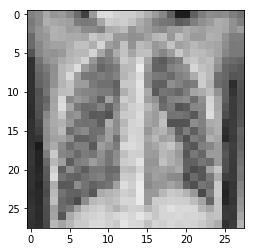

In [7]:
import matplotlib.pyplot as plt
plt.figure()

plt.imshow(images[5]) 
plt.show()

In [8]:
#autoencoder...
from keras.layers import Input , Dense
from keras.models import Model
import numpy as np 


In [482]:
## extra.. not needed.........
x_train = []
x = np.expand_dims(images, axis=0)
for i in range(0,524) : 
    ima = np.expand_dims(images[i], axis=0)
    x_train.append(ima)
    
x_test = []
for i in range(0,524) : 
    ima = np.expand_dims(noisy_images[i], axis=0)
    x_test.append(ima)

In [9]:

train_images = []
test_images = []
noisy_train_images = []
noisy_test_images = []
for i in range(0,450) : 
    ima = np.expand_dims(images[i], axis=0)
    im = np.expand_dims(noisy_images[i], axis=0)
    train_images.append(ima)
    noisy_train_images.append(im)

for i in range(450,524) :
    ima = np.expand_dims(images[i], axis=0)
    im = np.expand_dims(noisy_images[i], axis=0)
    test_images.append(ima)
    noisy_test_images.append(im)

In [10]:
train_images = np.reshape(train_images , (len(train_images),28,28,3))
test_images = np.reshape(test_images , (len(test_images),28,28,3))
noisy_train_images = np.reshape(noisy_train_images , (len(noisy_train_images),28,28,3))
noisy_test_images = np.reshape(noisy_test_images , (len(noisy_test_images),28,28,3))

train_images= train_images.astype('float') / 255
test_images= test_images.astype('float') / 255
noisy_train_images= noisy_train_images.astype('float') / 255
noisy_test_images= noisy_test_images.astype('float') / 255

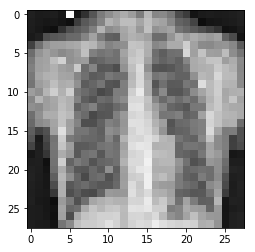

In [11]:
import matplotlib.pyplot as plt
plt.figure()

plt.imshow(train_images[0]) 
plt.show()

In [12]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# The encoding process
input_img = Input(shape=(28, 28, 3))  

############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Note:
# padding is a hyper-arameter for either 'valid' or 'same'. 
# "valid" means "no padding". 
# "same" results in padding the input such that the output has the same length as the original input.

In [13]:
############
# Decoding #
############

# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [14]:
# Declare the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

In [16]:
autoencoder.fit(noisy_train_images, train_images,
                epochs=100,
                batch_size  = 17,
                validation_data=(noisy_test_images, test_images) ,
                shuffle=True,
                
               )

Train on 450 samples, validate on 74 samples
Epoch 1/100
450/450 [==============================] - 5s 11ms/sample - loss: 0.6893 - accuracy: 0.0484 - val_loss: 0.6725 - val_accuracy: 0.0258
Epoch 2/100
450/450 [==============================] - 0s 646us/sample - loss: 0.6492 - accuracy: 0.0501 - val_loss: 0.6343 - val_accuracy: 0.0259
Epoch 3/100
450/450 [==============================] - 0s 680us/sample - loss: 0.6241 - accuracy: 0.0502 - val_loss: 0.6269 - val_accuracy: 0.0259
Epoch 4/100
450/450 [==============================] - 0s 686us/sample - loss: 0.6144 - accuracy: 0.0502 - val_loss: 0.6227 - val_accuracy: 0.0259
Epoch 5/100
450/450 [==============================] - 0s 707us/sample - loss: 0.6087 - accuracy: 0.0502 - val_loss: 0.6207 - val_accuracy: 0.0259
Epoch 6/100
450/450 [==============================] - 0s 704us/sample - loss: 0.6044 - accuracy: 0.0503 - val_loss: 0.6160 - val_accuracy: 0.0259
Epoch 7/100
450/450 [==============================] - 0s 749us/sample - l

In [19]:
path='C:\\Users\\DelowaR\\jupyder\\project_cse_3200\\noise_denoise_model\\'


In [20]:
autoencoder.save(path+'xray_noise_train_model.h5');
autoencoder.save_weights(path+'result_noise_train_model.h5');
autoencoder.save(path+'xray_noise_train.json')
autoencoder.save_weights(path+'xray_noise_train_weight.json')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\DelowaR\jupyder\project_cse_3200\noise_denoise_model\xray_noise_train.json\assets


In [22]:
# scores = autoencoder.evaluate_generator(test_data)
# print("\n%s: %.2f%%" % (autoencoder.metrics_names[1], scores[1]*100))

In [23]:
ima = np.expand_dims(noisy_train_images[12], axis=0)

ima

array([[[[0.06470588, 0.06470588, 0.06470588],
         [0.06078431, 0.06078431, 0.06078431],
         [0.06470588, 0.06470588, 0.06470588],
         ...,
         [0.07647059, 0.07647059, 0.07647059],
         [0.07647059, 0.07647059, 0.07647059],
         [0.08039216, 0.08039216, 0.08039216]],

        [[0.06862745, 0.06862745, 0.06862745],
         [0.05686275, 0.05686275, 0.05686275],
         [0.04117647, 0.04117647, 0.04117647],
         ...,
         [0.04901961, 0.04901961, 0.04901961],
         [0.07647059, 0.07647059, 0.07647059],
         [0.09215686, 0.09215686, 0.09215686]],

        [[0.06078431, 0.06078431, 0.06078431],
         [0.01764706, 0.01764706, 0.01764706],
         [0.26470588, 0.26470588, 0.26470588],
         ...,
         [0.25294118, 0.25294118, 0.25294118],
         [0.02941176, 0.02941176, 0.02941176],
         [0.08823529, 0.08823529, 0.08823529]],

        ...,

        [[0.05294118, 0.05294118, 0.05294118],
         [0.07254902, 0.07254902, 0.07254902]

In [24]:
ima.shape

(1, 28, 28, 3)

In [25]:
value = autoencoder.predict(ima)
value = value*255
#value = value.shape[:-1]
value = np.squeeze(value, axis = 0)
value = value.astype('float') / 255
value

array([[[0.13689861, 0.12623921, 0.12472806],
        [0.0644111 , 0.06044248, 0.06365419],
        [0.04413226, 0.04232368, 0.04390541],
        ...,
        [0.03062704, 0.03293788, 0.03193372],
        [0.03279039, 0.03152361, 0.03203261],
        [0.0386292 , 0.03541285, 0.03695217]],

       [[0.10617238, 0.09571981, 0.10615635],
        [0.0723488 , 0.06931755, 0.07293036],
        [0.05749377, 0.0566037 , 0.05983639],
        ...,
        [0.06709408, 0.07325309, 0.07065415],
        [0.05536067, 0.05590651, 0.05699247],
        [0.03250697, 0.02927968, 0.02904055]],

       [[0.23410671, 0.24073857, 0.24822554],
        [0.25667381, 0.26460087, 0.26788731],
        [0.23848533, 0.23329815, 0.24869117],
        ...,
        [0.24511046, 0.2331709 , 0.2452574 ],
        [0.19339564, 0.19152766, 0.18309212],
        [0.08488882, 0.09289136, 0.09042603]],

       ...,

       [[0.0081006 , 0.00792852, 0.00763264],
        [0.01210341, 0.01270902, 0.01172823],
        [0.04364792, 0

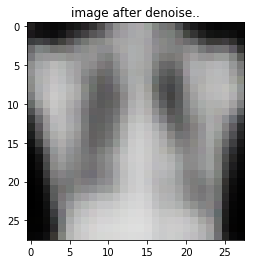

In [26]:

import matplotlib.pyplot as plt
plt.figure()
plt.title('image after denoise..')
plt.imshow(value) 
plt.show()

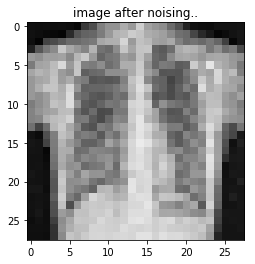

In [27]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('image after noising..')
ima = np.squeeze(ima, axis = 0)
plt.imshow(ima) 
plt.show()

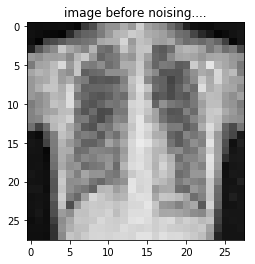

In [28]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('image before noising....')
#ima = np.squeeze(ima, axis = 0)
plt.imshow(train_images[12]) 
plt.show()

In [29]:
#not needed........
v= np.reshape(images , (len(images),28,28,3))
v.shape

(524, 28, 28, 3)

In [514]:
cv2.imwrite(s"imm.jpg",ima)

True